In [1]:
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer, AerSimulator, AerJob

import sys
sys.path.append('/workspaces/scribing/notebooks/quantum')
from quantum_helper_functions import *
import pandas as pd

# Calculating Conditional Probability

✨ **Bayes' Theorem:** 
$$ P(\text{Hypothesis}|\text{Evidence}) = P(\text{Hypothesis})\frac{P(\text{Evidence}|\text{Hypothesis})}{P(\text{Evidence})}

## Understanding the modifier probability
- `prior` is a probability representing our initial belief about the likelihood of an event or hypothesis before considering new evidence
- `modifier` is another probability that represents additional information, evidence, or a factor that modifiese or influences the prior probability

### Analogy to Bayesian Statistics
- **Prior probability (`prior`)**: Our initial belief before new evidence
- **Likelihood or modifying factor (`modifier`)**: The probability of observing the new evidence given a certain hypothesis
- **Posterior probability**: The updated belief after considering the new evidence 

In Bayesian updating, the posterior can be described mathematically as follows:
$$\text{Posterior} \propto \text{Prior} \times \text{Likelihood}$$

### Role of Modifier in the Quantum Circuit
In a quantum circuit, the **modifier probability** serves as the conditional probability or **likelihood** that modifies the system's stae based on new information. It is encoded in the controlled $Y$-rotation (`cry`) gate, which affects the state of the target qubit based on the state of the control qubit.

The modifier can be any positive number, but most likely, it is a number close to 1.
- If the `modifier = 1 `, prior is equal to the posterior probability and the $\text{Evidence}$ does not provide any new information.

## Calculating the conditional probability for a modifier $<1$ 

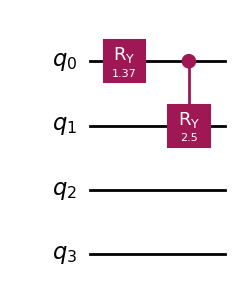

In [3]:
# Specify the prior probability and the modifier
prior = 0.4
modifier = 0.9

qc = QuantumCircuit(4)

# Set up qubit prior
qc.ry(prob_to_angle(prior), 0)

# Apply the controlled RY-gate
qc.cry(prob_to_angle(modifier), 0, 1)

qc.draw('mpl')

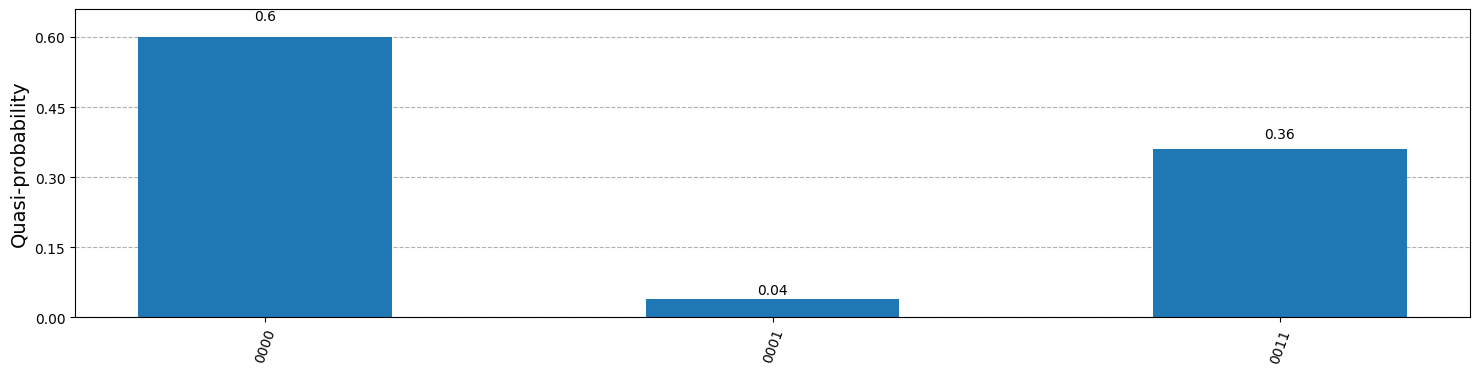

In [4]:
run_circuit(qc)

## Calculating the Conditional Probability for a modifier $> 1$
⚠️ By design, this code will produce an error


In [5]:
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Set up qubit to prior
qc.ry(prob_to_angle(prior), 0)

# Apply modifier
qc.cry(prob_to_angle(modifier), 0, 1)

run_circuit(qc)

ValueError: math domain error

Note that we will get a math domain error because the function `prob_to_angle` is only defined for values between `0` and `1`. For values greater than `1`, the $\arcsin$ is not defined.

### Rethinking our approach...
- If the modifier is greater than `1.0`, then $\text{posterior} > \text{prior}$
- Specifically, the posterior probability will be greater than the prior probability by an amount $(\text{modifier}-1)\cdot\text{prior}$ :
    $$ \text{posterior} = \text{prior} + \big((\text{modifier}-1)\cdot\text{prior}\big)$$

### Working with a reduced modifier
Since the transformation gate cuts the overall probability of `1.0` into pieces, why don't we separate the `prior` not once, but twice?
- Then, we can apply the *reduced modifier**, $\text{modifier}-1$ on one of the two states representing the prior. 
- The sum of the untouched prior and the applied reduced modifier should be the conditional probability
  
For the following code, we will apply the `prior` to qubit 0 (line 9) and qubit 1 (line 12). THen, we will apply the reduced modifier to qubit 2 through a $R_Y$-gate controlled by qubit 0.

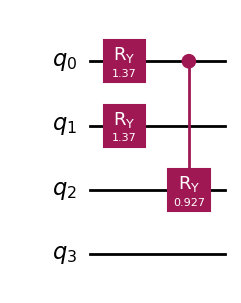

In [6]:
# Working with the reduced modifier
# Specify the prior probability and the modifier
prior - 9.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.ry(prob_to_angle(prior), 1)

# Apply a modifier to qubit 2
qc.cry(prob_to_angle(modifier-1), 0, 2)

qc.draw('mpl')

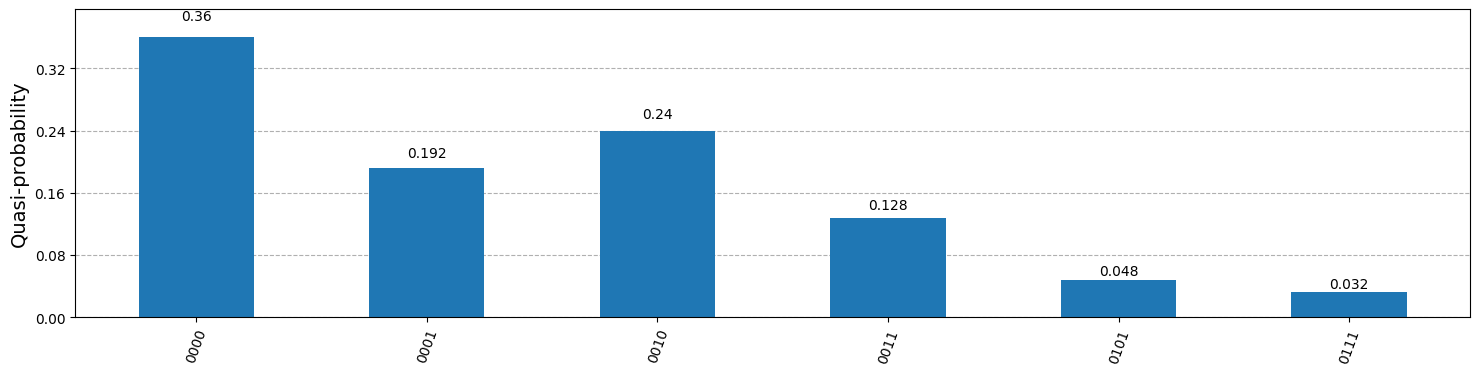

In [7]:
run_circuit(qc)

 ⚠️ FOR SOME REASON THIS IS INCORRECT... I NEED TO TAKE A BREAK BEFORE I FIGURE OUT THE DETAILS


SEE WORKING WITH MULTIPLE QUBITS MODULE, LESSON - CALCULATING CONDITIONAL PROBABILITY

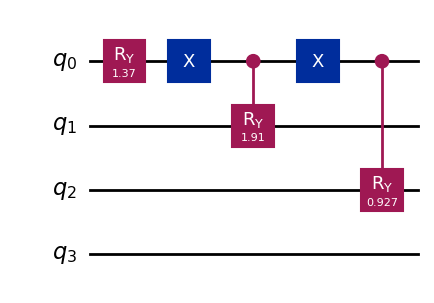

In [12]:
# CORRECT REDUCED MODIFIER CODE
# Specify the prior probability and the modifier
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

# Apply prior to qubit 0 
qc.ry(prob_to_angle(prior), 0)

# Apply prior to qubit 1
qc.x(0)
qc.cry(prob_to_angle(prior/(1-prior)), 0, 1)
qc.x(0)

# Apply the modifier to qubit 2
qc.cry(prob_to_angle(modifier-1), 0, 2)

qc.draw('mpl')

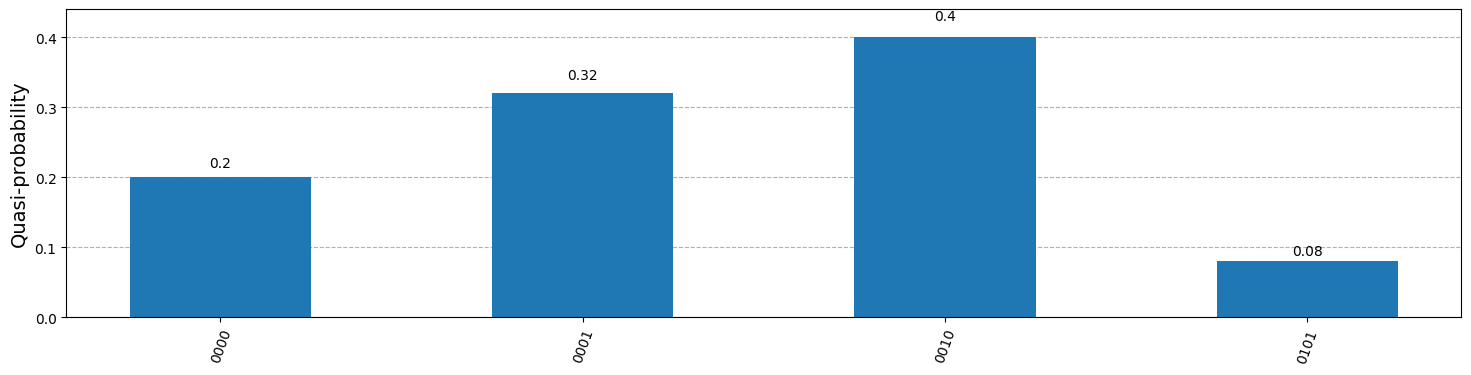

In [13]:
run_circuit(qc)